<a href="https://colab.research.google.com/github/jrakhshanda/Text-Mining/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Sentiment Extraction

In [ ]:
!pip install tokenizers
!pip install transformers

In [7]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [11]:
print(df_train.shape)
df_train.sample(5)

(8191, 4)


,textID,text,selected_text,sentiment
7617,d7b04db569,schoool time. not doing much this week. about...,can`t wait for the last day of school.,positive
5573,bc209b3ad3,You know you`re up too late when the TCU night...,You know you`re up too late when the TCU night...,neutral
101,15e01e1749,"Certainly not Cheers than, huh?","Certainly not Cheers than, huh?",neutral
242,06cad97de6,If only we could ever actually be allowed to ...,If only we could ever actually be allowed to s...,neutral
7789,07593d8cba,"Yo! Its moms day today, so do it big for mom d...",so do it big for mom,positive


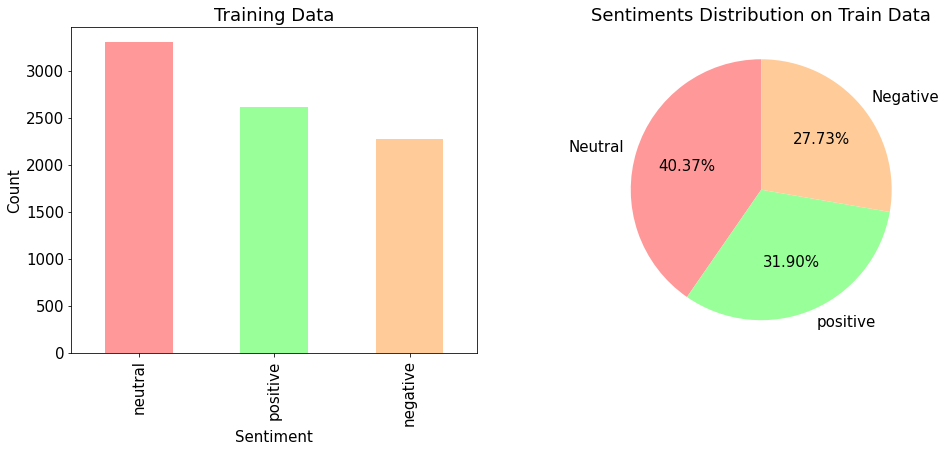

In [12]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
df_train["sentiment"].value_counts().plot(kind='bar',color = ['#ff9999','#99ff99','#ffcc99'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title('Training Data')

lst1 = [df_train.sentiment[df_train.sentiment == 'neutral'].count(),
        df_train.sentiment[df_train.sentiment == 'positive'].count(),
        df_train.sentiment[df_train.sentiment == 'negative'].count()]
        
plt.subplot(1, 2, 2)
plt.pie(lst1, labels=["Neutral", "positive", "Negative"], startangle=90, autopct='%.2f%%',colors=['#ff9999','#99ff99','#ffcc99'])
plt.title('Sentiments Distribution on Train Data')
plt.show()

In [13]:
print(df_test.shape)
df_test.sample(6)

(3534, 3)


,textID,text,sentiment
1590,6e41749ac7,hey i tried callin u but it wont let me,neutral
2306,e4fa21bd2f,Really bad ones are also classic.,neutral
3387,645e740cb0,"lmao...thats sad, kinda discourages me 4rom g...",negative
3144,10c55c13b8,really annoyed that work appear to have blocke...,negative
790,993c6eadd2,_d you`re gonna take good care of that little ...,positive
3298,79f88c9c67,Oh no....Sorry to hear that ....,negative


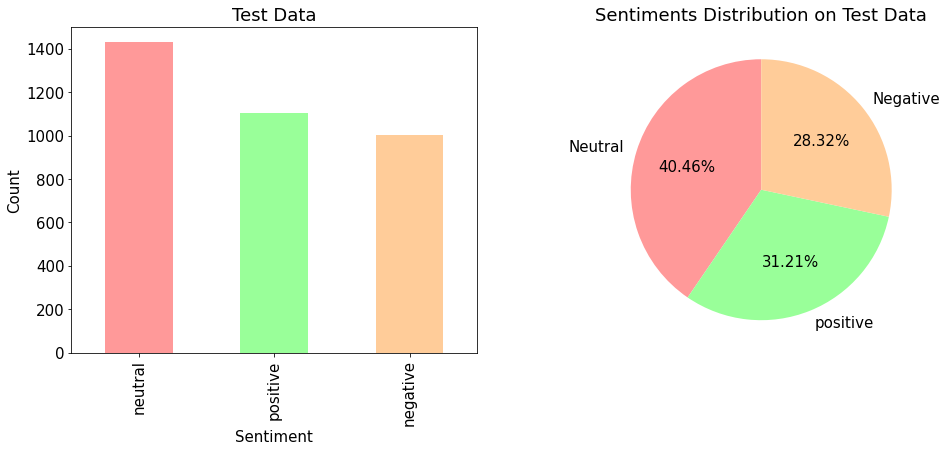

In [14]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
df_test["sentiment"].value_counts().plot(kind='bar',color = ['#ff9999','#99ff99','#ffcc99'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title('Test Data')

lst1 = [df_test.sentiment[df_test.sentiment == 'neutral'].count(),
        df_test.sentiment[df_test.sentiment == 'positive'].count(),
        df_test.sentiment[df_test.sentiment == 'negative'].count()]
plt.subplot(1, 2, 2)
plt.pie(lst1, labels=["Neutral", "positive", "Negative"], startangle=90, autopct='%.2f%%',colors=['#ff9999','#99ff99','#ffcc99'])
plt.title('Sentiments Distribution on Test Data')
plt.show()

## Pre-processing of the Data

In [15]:
from bs4 import BeautifulSoup
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [22]:
def clean_data(text):

  """convert te text to lowercase, remove URL, remove HTML tags and convert emojis to actual expression on the form of text.

    Args:
        text: A string of text.
  
  """
  text = " ".join(str(text).split()) # Split, Concatenate, and Join
  text = str(text).lower()
  text = re.sub('\n', '', text)
  text = BeautifulSoup(text,"lxml").get_text() # removing HTML tags
  text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL

  return text

In [23]:
df_train.dropna()
df_test.dropna()

df_train['text'] = [clean_data(i) for i in df_train['text']]
df_train['selected_text'] = [clean_data(i) for i in df_train['selected_text']]

df_test['text'] = [clean_data(i) for i in df_test['text']]

In [18]:
df_test.insert(2,'selected_text',np.nan)

## Configuration

For configuration, we will use the transformer library that hosts relevant information concerning the model we will be using, such as the number of layers, batch size, number of epochs, and the number of attention heads.

In [ ]:
Train_batch_size = 32
valid_batch_size = 8
epochs = 5

##Tokenization

We are constructing a RoBERTa tokenizer, derived from the GPT-2 tokenizer, using byte-level Byte-Pair-Encoding.

[refrence](https://huggingface.co/transformers/model_doc/roberta.html#)

[source](https://huggingface.co/transformers/_modules/transformers/models/roberta/tokenization_roberta.html#RobertaTokenizer)

In [19]:
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
from transformers import *
import tokenizers
from transformers import RobertaTokenizer

In [ ]:
max_len = max([len(i) for i in df_train['text']])
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [21]:
#def tokenize_data(df, tokenizer, max_len):

df = df_train
n = df.shape[0]

input_ids = np.ones((n,max_len),dtype='int32')
attention_mask = np.zeros((n,max_len),dtype='int32')
token_type_ids = np.zeros((n,max_len),dtype='int32')
beg_tokens = np.zeros((n,max_len),dtype='int32')
end_tokens = np.zeros((n,max_len),dtype='int32')

for i in range(n):

  # FIND OVERLAP OR INTERSECTIONOF BOTH THE TEXTS

  text = " "+" ".join(str(df.loc[i,'text']).split()) # yields a whitespace at beginning of text
  selected_text = df.loc[i,'selected_text']

  idx = text.find(selected_text) # gives the count of appearance
  chars = np.zeros((len(text)))
  chars[idx:idx+len(selected_text)] = 1 
  
  if text[idx-1] == ' ': chars[idx-1] = 1
  enc = tokenizer.encode(text)

IndexError: ignored

In [ ]:
idx = text.find(selected_text)
idx

In [109]:
len(selected_text)

57

In [110]:
len(text)

59